# Why People Really Quit Their Jobs?
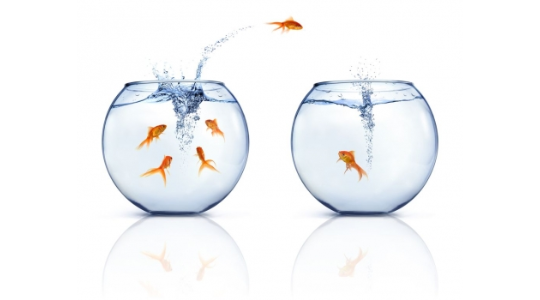

#### Turns out, the reasons people love and hate their work are largely the same across sectors. Step one to retention: Understanding why and how it fails. 

#### Many companies spend a great amount of time money investigating the causes of employee turnover—for example, through programs of exit interviews. Usually the intent behind such studies is to find out why people leave—the idea being that if a company can identify the reasons for terminations, it can work to hold terminations, and turnover, down.

#### Having said that, this is the challenge that I am going to face. I have found a dataset (it seems to be very popular) which will help me to solve it.

#### First of all, I will have to analice and understand the data in detail in order to make the right assumptions and to choose the right algorithm.

#### Goals are as follows:

 - #### **why are our best and most experienced employees leaving prematurely?**
 - #### **using machine learning tools, try to predict which valuable employees will leave next **
 
I am ready. Let´s go for it!

# 1. Import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Sources and some ideas

In [6]:
#inspiration
#https://www.kaggle.com/liujiaqi/employee-resign-initial-eda/notebook
#https://rpubs.com/DanielIzaguirre/232058

# 2. Load Data

In [9]:
hr=pd.read_csv("data/HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 3. Analisys Data and variables

Analize and understand the data in detail in order to make the right assumptions and to choose the right algorithm
    - is there any null value?
    - change format, position and name of columns
    - ...

In [10]:
#Size of dataset
hr.shape

(14999, 10)

In [11]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Is there any "null" value in the data set?

In [12]:
hr.isnull().sum()
#there is no empty data

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [13]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Could we know which variable has the most influence to stay or leave a job?

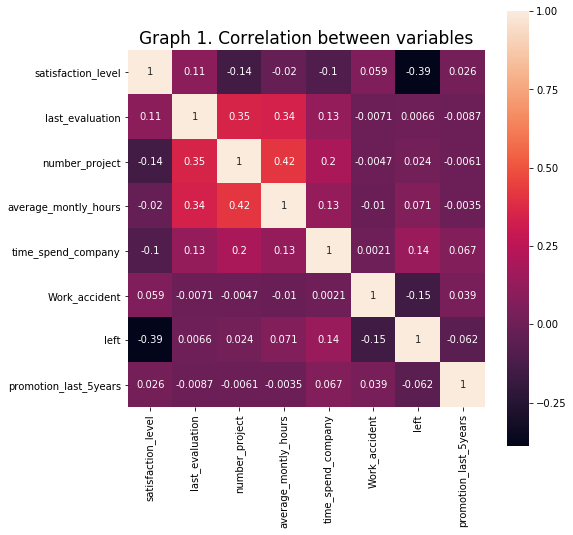

In [14]:
# Correlation heatmap
plt.figure(figsize=(8, 8))  
sns.heatmap(hr.corr(), vmax=1, square=True,annot=True) 
plt.title("Graph 1. Correlation between variables", fontsize = 17)
plt.show()

### Graph 1:  As expected,  the "satisfaction level"  has the largest correlation (and negative) with the decision to stay or leave

In [15]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

### I will change the order of columns. Now "left" column  will be the last one

In [16]:
cols = hr.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [17]:
cols[:6]+cols[7:]+cols[6:7]

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'sales',
 'salary',
 'left']

####  Having a look at "sales column" I realize that it takes the name of the department/unit  with  the largest number of employees. So to get clear, I am going to rename this column to "department" 
#### I am also going to rename "RandD" category  to "others"

In [18]:
hr.groupby('sales')['left'].count()

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: left, dtype: int64

In [19]:
hr.columns=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary']
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [346]:
#instead of Random, I will use "others"
hr[hr.department == "RandD"] = "others"

### Jobs Breakdown by department

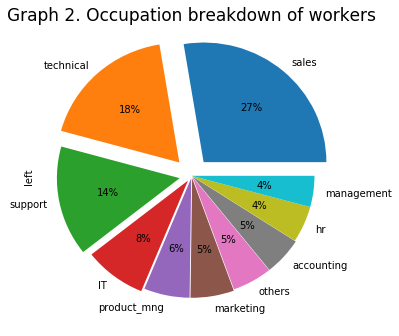

In [352]:
dep=hr.groupby('department')['left'].count().sort_values(ascending=False)

#Graph
explode=(0.15,0.15,0.1,0.05,0.02,0.02,0.01,0.01,0,0) #highlight the 4 main values
dep.plot.pie(autopct='%1d%%',figsize=(5.5,5.5),use_index=None,explode=explode) #use of autopct to display the percent value 
plt.title("Graph 2. Occupation breakdown of workers", fontsize = 17)
plt.show()

_*Graph 1*: shows that *Sales* has the largest number of employees in the company (27%). Technical and Support are in second and third place in the ranking_

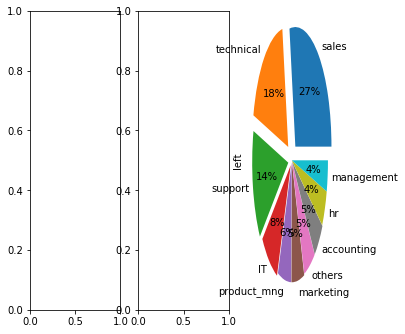

In [357]:
fig, axes = plt.subplots(ncols=3, figsize=(20,20))

